# **Heart Disease Prediction Model**



[Click here for the Kaggle Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

### Step 1: Import the necessary libraries

In [70]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

### Step 2: Load the dataset

In [71]:
df = pd.read_csv(r'/workspaces/Heart-Disease-Prediction-Model/data/heart.csv')

### Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [72]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [73]:
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [74]:
print('Information about the columns and its datatypes')
df.info()

print('\nShape of the data')
print(df.shape)
row, col = df.shape

print('Number of Rows :', row)
print('Number of Columns :', col)

Information about the columns and its datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  Target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Shape of the data
(918, 12)
Number of Rows : 918
Number of Columns : 12


### Step 4: Statistical Insights

In [75]:
df.groupby('Target').size()

Target
0    410
1    508
dtype: int64

In [76]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [77]:
df['Target'].value_counts()

1    508
0    410
Name: Target, dtype: int64

1 represents Defective heart

0 represents Healthy heart

### Step 5: Data Cleaning

Handling outliers, duplicates and missing values

**Missing Values**

In [78]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Target            0
dtype: int64

**Duplicate Values**

In [79]:
df.duplicated().sum()

0

**Outliers**

*Age*

<Axes: xlabel='Age'>

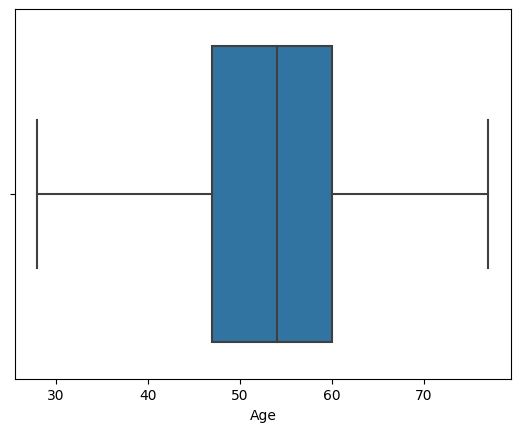

In [80]:
sns.boxplot(x = 'Age', data=df)

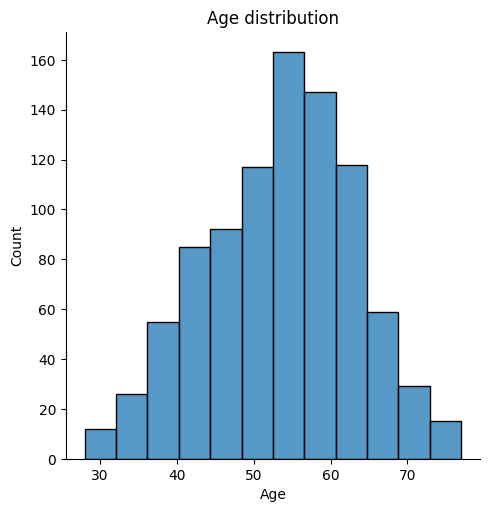

In [81]:
sns.displot(df['Age'], bins=12)
plt.title('Age distribution')
plt.show()

From the above graph, we can deduce that most patients lie between the ages of 50 and 60 years.

*Sex*

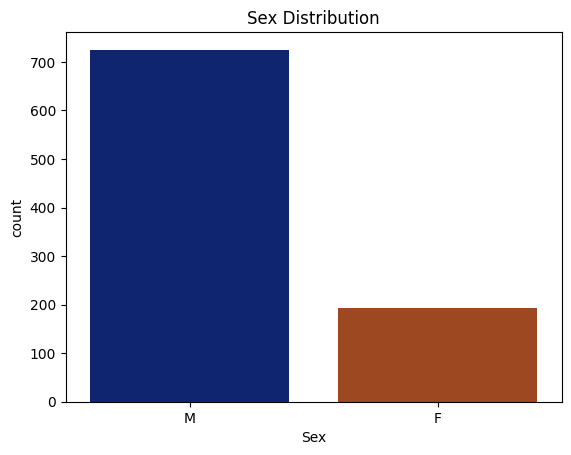

In [82]:
sns.countplot(x = 'Sex', data=df, palette='dark')
plt.title('Sex Distribution')
plt.show()

The difference between the number of the two classes is very large. It needs to be standardized.

In [83]:
df['Sex'].value_counts(normalize=True)

M    0.78976
F    0.21024
Name: Sex, dtype: float64

*Chest Pain Type*

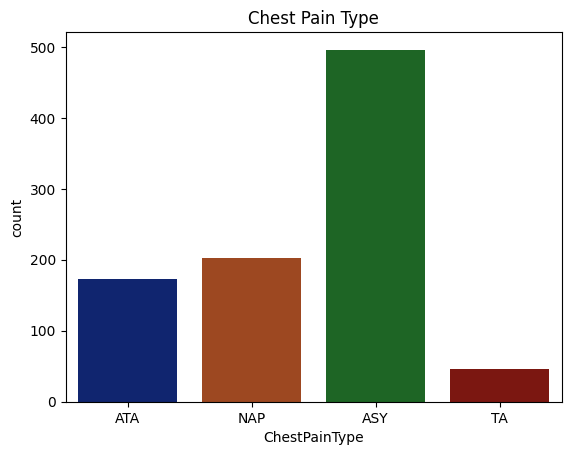

In [84]:
sns.countplot(x ='ChestPainType', data=df, palette='dark')
plt.title('Chest Pain Type')
plt.show()

*Resting Blood Pressure*

<Axes: xlabel='RestingBP'>

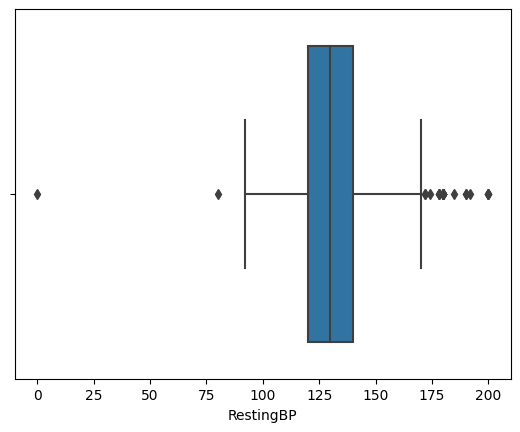

In [85]:
sns.boxplot(x = 'RestingBP', data=df)

In [86]:
df = df[df['RestingBP']>75]
df = df[df['RestingBP']<175]

In [87]:
df.shape

(894, 12)

*Cholesterol*

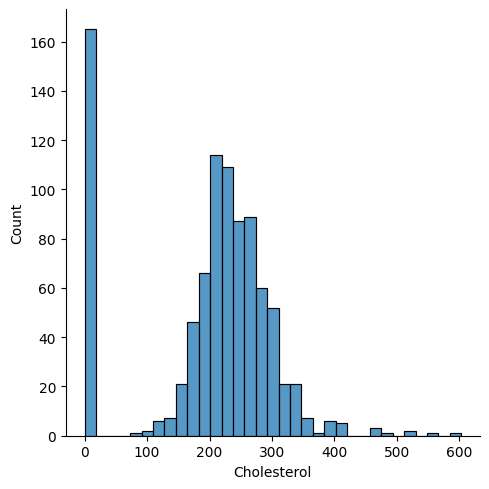

In [88]:
sns.displot(x = 'Cholesterol', data=df)
plt.show()

<Axes: xlabel='Cholesterol'>

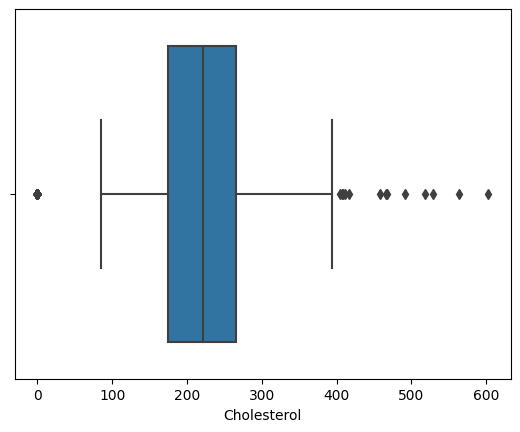

In [89]:
sns.boxplot(x = 'Cholesterol', data=df)

In [90]:
df = df[df['Cholesterol']>0]

In [91]:
df.shape

(729, 12)

*Fasting Blood Sugar*

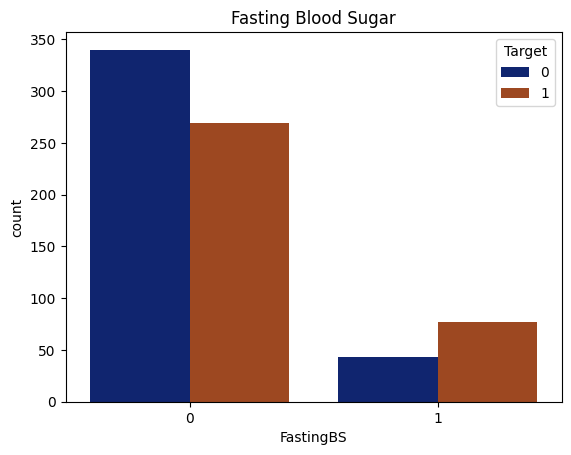

In [92]:
sns.countplot(x = 'FastingBS', hue='Target',data=df,palette='dark')
plt.title('Fasting Blood Sugar')
plt.show()

### Step 6: Data Visualisation

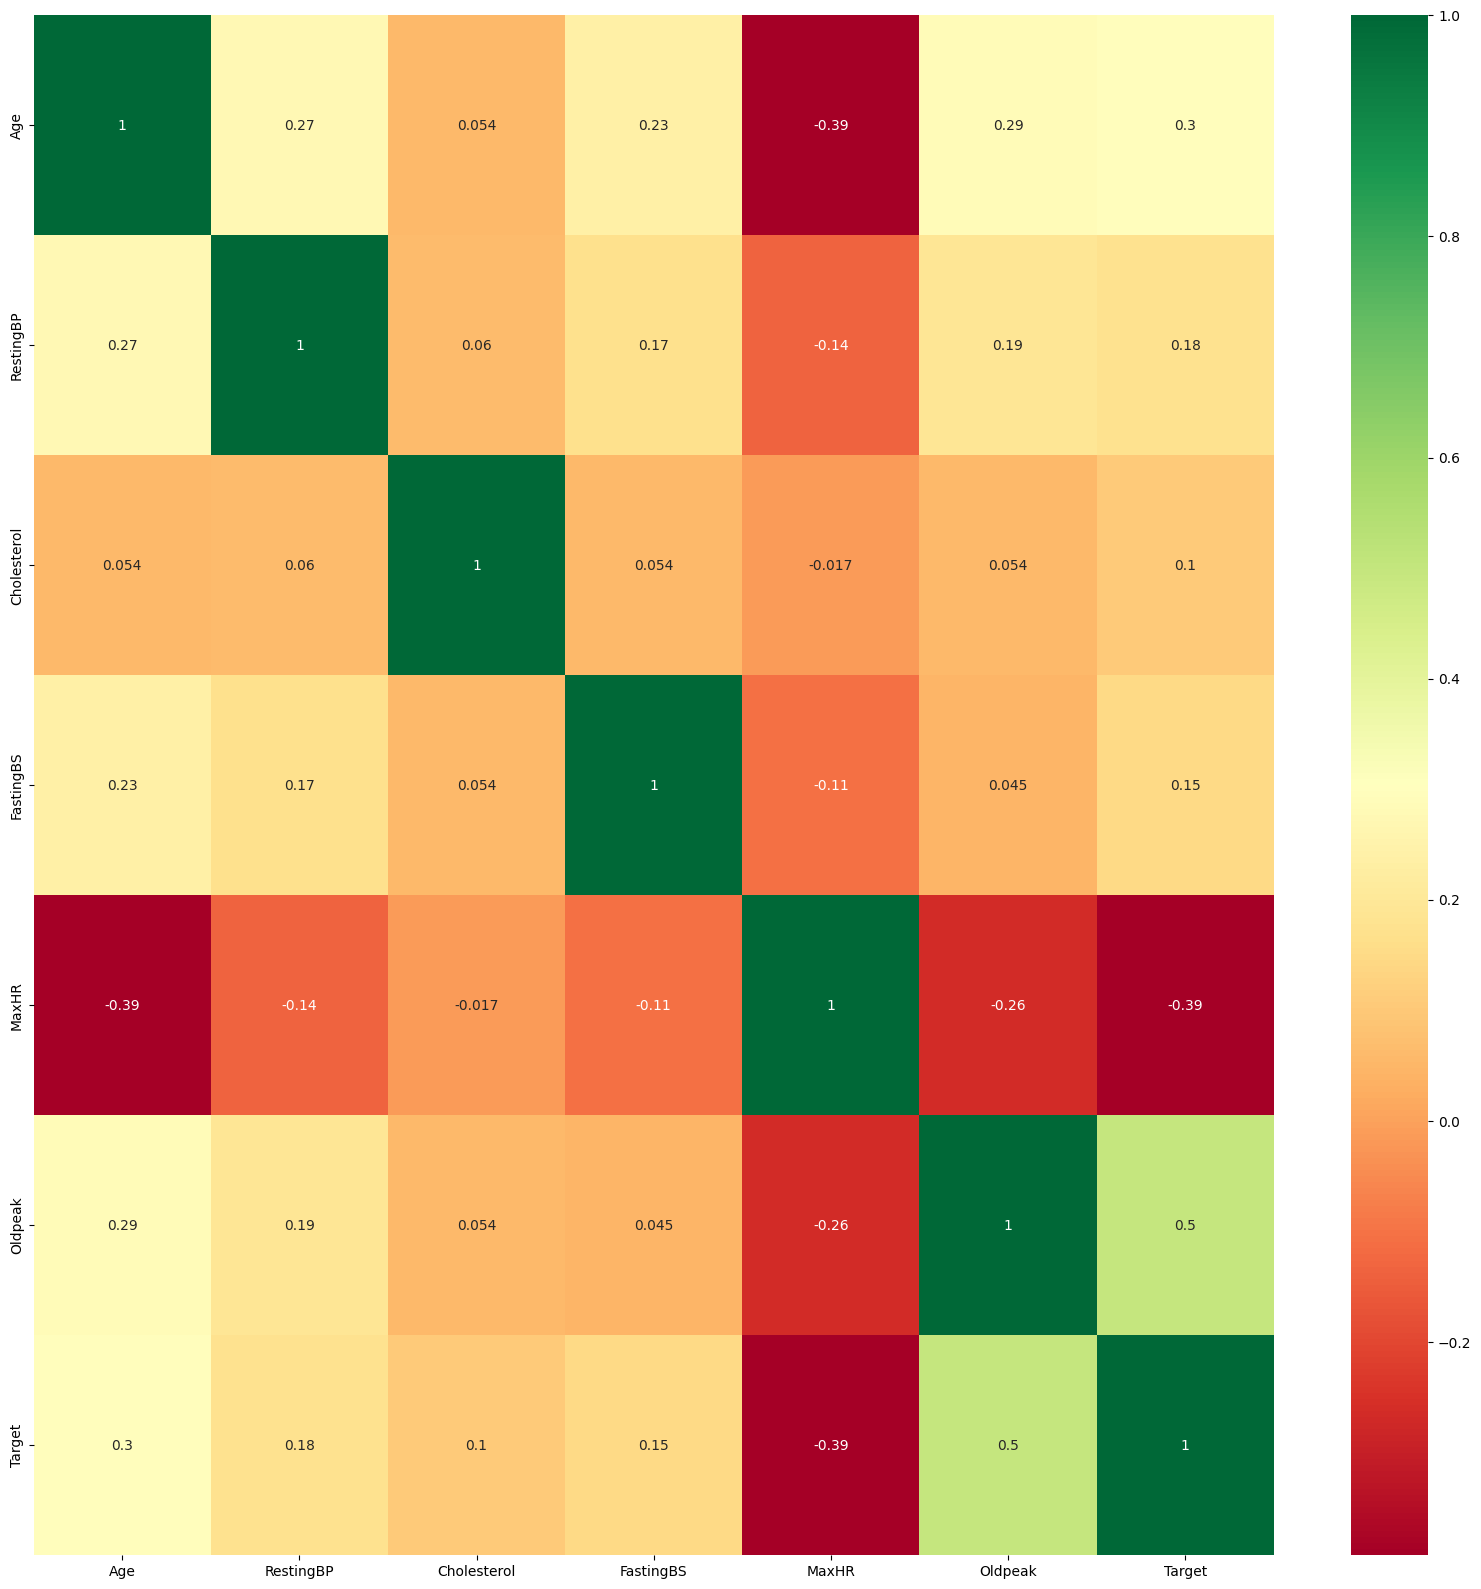

In [93]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: xlabel='Target', ylabel='count'>

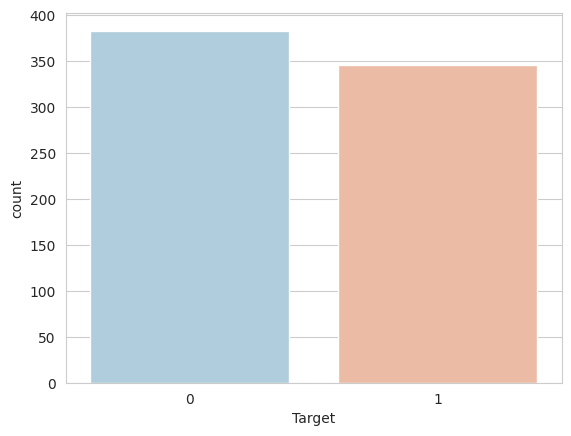

In [94]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=df,palette='RdBu_r')

### Step 8: Data Modelling

* Train-Test-Split 
* Fit the model to perform predictions
* Comparing the following algorithms to see which model performs the best

In [95]:
X = df.drop(columns='Target',axis=1)
Y= df['Target'] 

In [96]:
print(X)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
0      172              N      0.0       

In [97]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: Target, Length: 729, dtype: int64


In [98]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [99]:
print(X.shape,X_train.shape,X_test.shape)

(729, 11) (583, 11) (146, 11)


In [100]:
df= pd.get_dummies(df,columns=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina'])

In [101]:
from sklearn.model_selection import train_test_split
from sklearn .preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale =['Age','MaxHR','Oldpeak']
df[columns_to_scale]= StandardScaler.fit_transform(df[columns_to_scale])

### Step 9: Model Evaluation

### Step 10: Testing the Model

- Take user input and predict the output